In [2]:
from skimage import color, io
import matplotlib.pyplot as plt
import cv2 as cv2
import numpy as np
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage.filters import threshold_otsu


In [3]:
# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

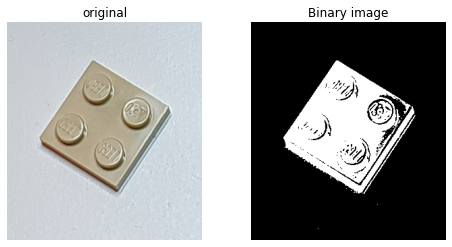

In [4]:
path = "data/"
img_org = io.imread(path + "lego_5.png")
img_gray = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
thres_otsu = threshold_otsu(img_gray)
bin_img = img_gray < thres_otsu

plot_comparison(img_org, bin_img, "Binary image")

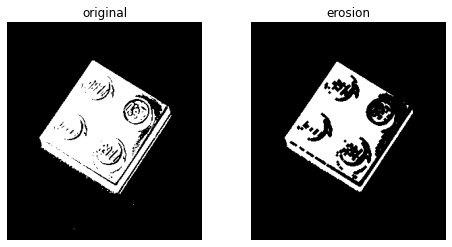

In [5]:
## Exercise 2

footprint = disk(2)
# Check the size and shape of the structuring element
# print(footprint)

eroded = erosion(bin_img, footprint)
plot_comparison(bin_img, eroded, "erosion")


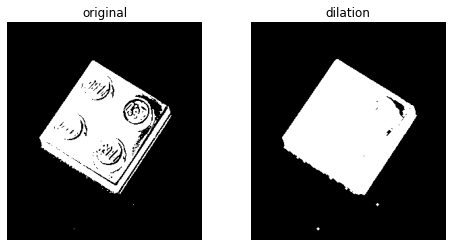

In [6]:
## Exercise 3

footprint = disk(2)
dilated = dilation(bin_img, footprint)
plot_comparison(bin_img, dilated, 'dilation')

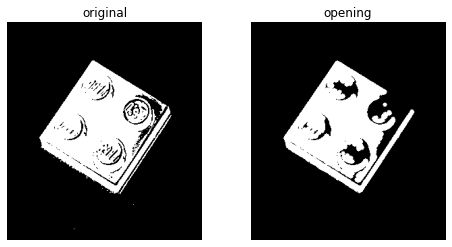

In [7]:
## Exercise 4
footprint = disk(3)
opened = opening(bin_img, footprint)
plot_comparison(bin_img, opened, 'opening')

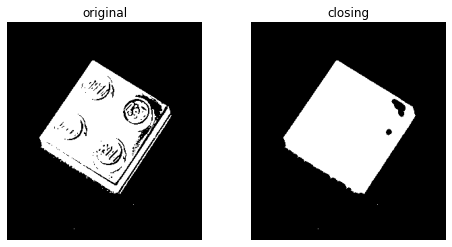

In [8]:
## Exercise 5
footprint = disk(3)
closed = closing(bin_img, footprint)
plot_comparison(bin_img, closed, 'closing')

In [9]:
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline

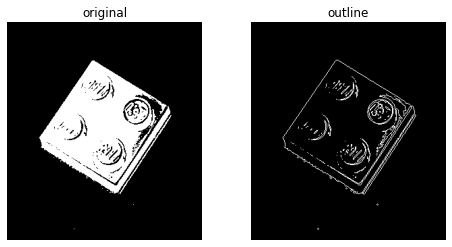

In [10]:
## Exercise 6
outline = compute_outline(bin_img)
plot_comparison(bin_img, outline, 'outline')

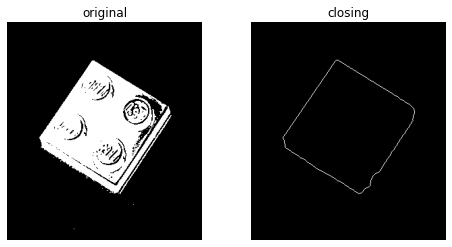

In [11]:
##Exercise 7

footprint1 = disk(1)
opened2 = opening(bin_img, footprint1)
footprint2 = disk(15)
closing2 = closing(opened2, footprint2)
outline2 = compute_outline(closing2)
plot_comparison(bin_img, outline2, 'closing')

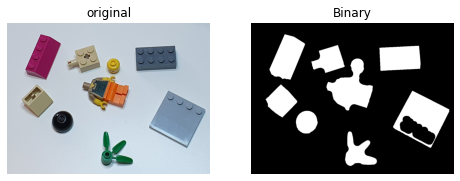

In [12]:
## Exercise 8 & 9 & 10
img_7 = io.imread("data/lego_3.png")
img_7_gray = cv2.cvtColor(img_7, cv2.COLOR_BGR2GRAY)

thres = threshold_otsu(img_7_gray)
img_7_bin = img_7_gray < thres

footprint = disk(20)
closed_7 = closing(img_7_bin, footprint)

plot_comparison(img_7, closed_7, "Binary")
# io.imshow(img_7_bin)
# io.show()

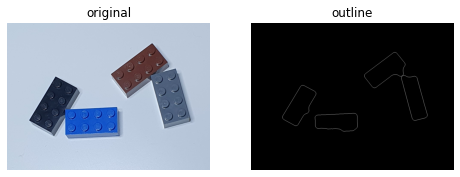

In [13]:
## Exercise 11 & 12
img_9 = io.imread("data/lego_9.png")
img_9_gray = cv2.cvtColor(img_9, cv2.COLOR_BGR2GRAY)

thres = threshold_otsu(img_9_gray)
img_9_bin = img_9_gray < thres

footprint = disk(3)
closed_9 = closing(img_9_bin, footprint)

foot_ero = disk(40)
erosed_9 = erosion(closed_9, foot_ero)

foot_dil = disk(12)
dilated_9 = dilation(erosed_9, foot_dil)

img_out = compute_outline(dilated_9)



plot_comparison(img_9, img_out, "outline")

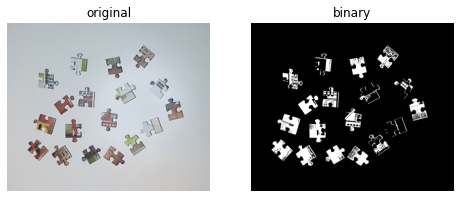

In [18]:
## Exercise 15 and 16

img_puz = io.imread("data/puzzle_pieces.png")
img_puz_gray = cv2.cvtColor(img_puz, cv2.COLOR_BGR2GRAY)

thres = threshold_otsu(img_puz_gray)
img_puz_bin = img_puz_gray < thres

foot = disk(1)
open_puz = opening(img_puz_bin, foot)

plot_comparison(img_puz, open_puz, "binary")